# Bottle Cap Detection

## Project Description

The objective of this notebook is to explore the initial data, understand its structure, and prepare it for model training. It also aims to build intuition and reasoning behind the model development process, present the results, and draw conclusions.

##### Import Libraries

In [1]:
import cv2
import os
import glob
from pathlib import Path
import matplotlib.pyplot as plt

#### Data Exploration

Error processing line in ../sample\raw-250110_dc_s001_b2_1.txt: 2 0.441375 0.488031 0.081350 0.060110. Error: list index out of range
Error processing line in ../sample\raw-250110_dc_s001_b2_1.txt: 2 0.310675 0.815020 0.081350 0.061503. Error: list index out of range
Error processing line in ../sample\raw-250110_dc_s001_b2_1.txt: 2 0.190663 0.447149 0.081350 0.060110. Error: list index out of range
Error processing line in ../sample\raw-250110_dc_s001_b2_15.txt: 2 0.475406 0.100271 0.084588 0.065671. Error: list index out of range
Error processing line in ../sample\raw-250110_dc_s001_b2_15.txt: 2 0.760931 0.494023 0.084563 0.066603. Error: list index out of range
Error processing line in ../sample\raw-250110_dc_s001_b2_15.txt: 2 0.643656 0.407169 0.081938 0.063437. Error: list index out of range
Error processing line in ../sample\raw-250110_dc_s001_b2_15.txt: 2 0.573400 0.458712 0.087775 0.067405. Error: list index out of range
Error processing line in ../sample\raw-250110_dc_s001_b2_1

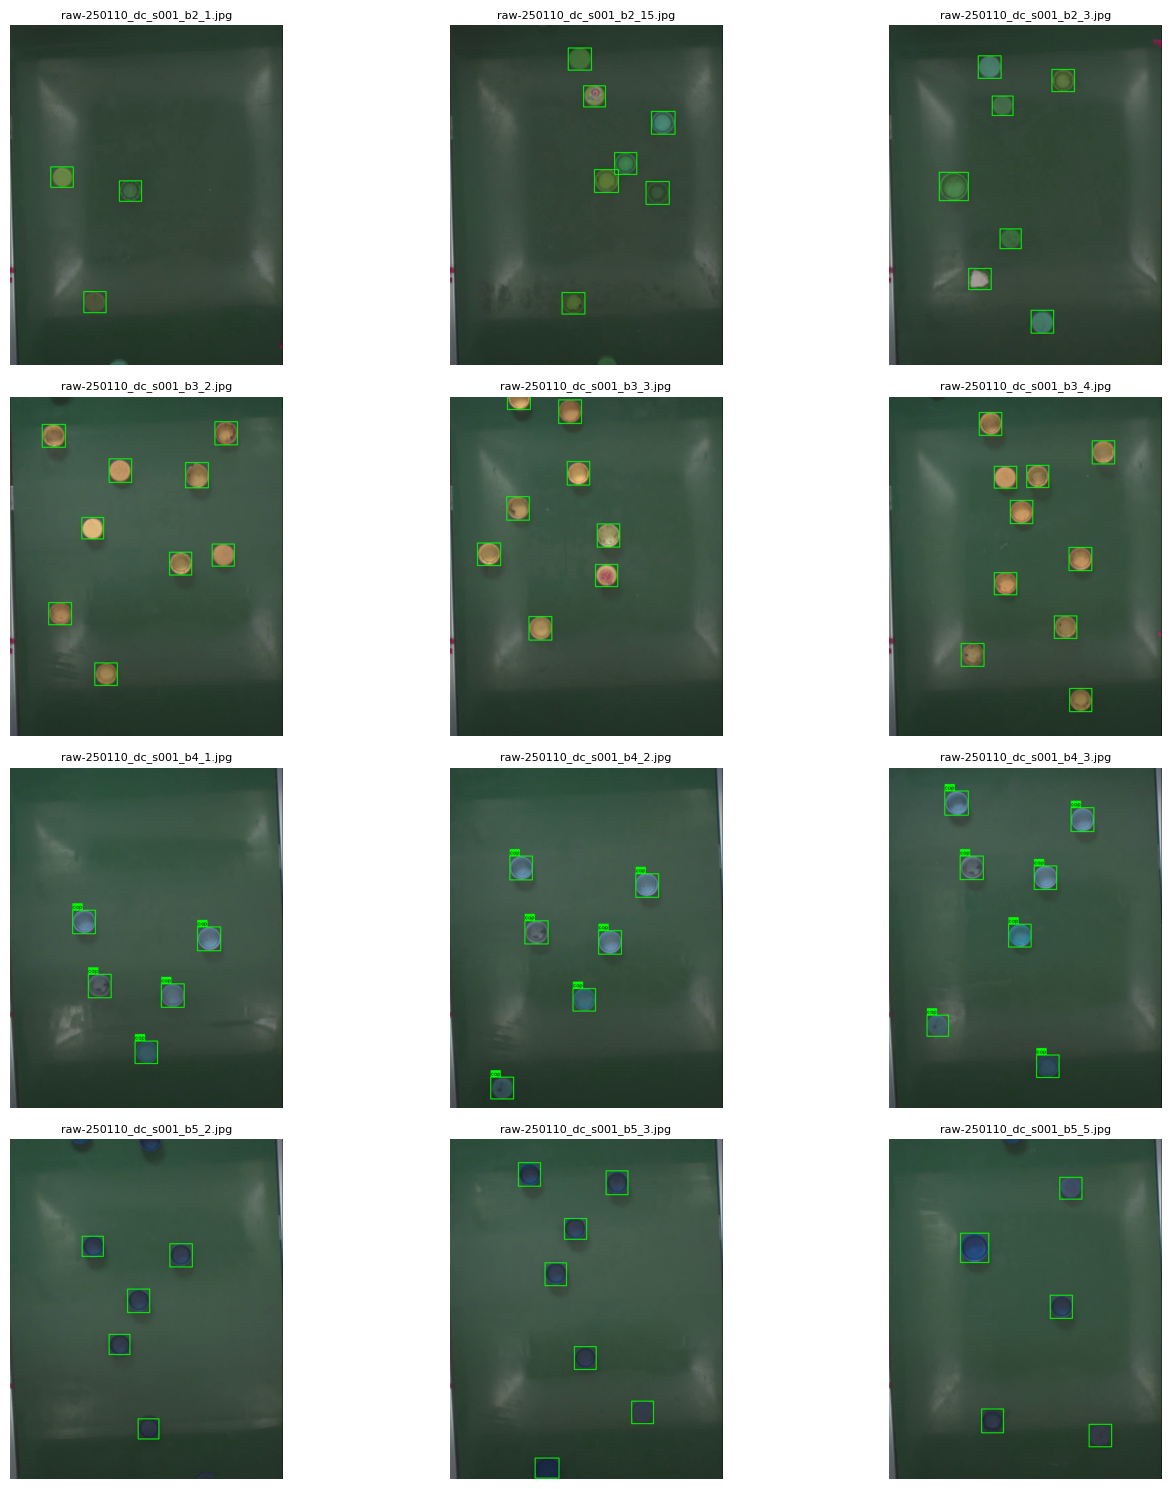

In [2]:
def plot_bounding_boxes(ax, image_path, label_path, class_names=None):
    """
    Plot bounding boxes on an image from YOLO format label file.
    
    Args:
        ax: Matplotlib axis object to plot on
        image_path (str): Path to the image file
        label_path (str): Path to the YOLO format label file
        class_names (list, optional): List of class names. Defaults to None.
    """
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not read image {image_path}")
        return
    
    # Convert from BGR to RGB for matplotlib
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img_height, img_width = image.shape[:2]
    
    # Read the label file if it exists
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            lines = f.readlines()
        
        # Process each bounding box
        for line in lines:
            try:
                # Parse YOLO format: class_id center_x center_y width height (normalized)
                class_id, x_center, y_center, width, height = map(float, line.strip().split())
                
                # Convert YOLO format to pixel coordinates
                x_center *= img_width
                y_center *= img_height
                width *= img_width
                height *= img_height
                
                # Calculate top-left and bottom-right coordinates
                x1 = int(x_center - width/2)
                y1 = int(y_center - height/2)
                x2 = int(x_center + width/2)
                y2 = int(y_center + height/2)
                
                # Draw rectangle
                color = (0, 255, 0)  # Green color
                thickness = 2
                cv2.rectangle(image, (x1, y1), (x2, y2), color, thickness)
                
                # Add class label if class_names is provided
                if class_names:
                    class_name = class_names[int(class_id)]
                    label = f"{class_name}"
                    
                    # Calculate text size
                    (text_width, text_height), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
                    
                    # Draw background rectangle for label
                    cv2.rectangle(image, (x1, y1 - 20), (x1 + text_width, y1), color, -1)
                    
                    # Put text
                    cv2.putText(image, label, (x1, y1 - 5), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            except Exception as e:
                print(f"Error processing line in {label_path}: {line.strip()}. Error: {e}")
    
    # Display the image on the axis
    ax.imshow(image)
    ax.axis('off')
    ax.set_title(os.path.basename(image_path), fontsize=8)

# Define your class names (modify according to your dataset)
class_names = ['cap']  # Assuming 'cap' is your class name

# Set up the figure with subplots
n_cols = 3
n_rows = 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))
fig.tight_layout(pad=3.0)

# Flatten the axes array for easier iteration
axes = axes.ravel()

# Get all image files
image_dir = "../sample"  # Update this path
image_files = sorted(glob.glob(f"{image_dir}/*.jpg"))  # sort for consistent ordering

# Process and display up to n_cols * n_rows images
for idx, image_path in enumerate(image_files[:n_cols * n_rows]):
    label_path = image_path.replace('.jpg', '.txt')
    plot_bounding_boxes(axes[idx], image_path, label_path, class_names)

# Hide any remaining empty subplots
for idx in range(len(image_files), n_cols * n_rows):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

In [3]:
def plot_bounding_boxes(ax, image_path, label_path, class_names):
    """
    Plot bounding boxes on an image from YOLO format label file.
    """
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not read image {image_path}")
        return
    
    # Convert from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img_height, img_width = image.shape[:2]
    
    # Read the label file
    if not os.path.exists(label_path):
        print(f"Label file not found: {label_path}")
        ax.imshow(image)
        ax.axis('off')
        return

    with open(label_path, 'r') as f:
        lines = f.readlines()
    
    # Process each bounding box
    for line in lines:
        try:
            # Parse YOLO format: class_id center_x center_y width height (normalized)
            parts = line.strip().split()
            if len(parts) < 5:
                continue
                
            class_id = int(parts[0])
            x_center = float(parts[1]) * img_width
            y_center = float(parts[2]) * img_height
            width = float(parts[3]) * img_width
            height = float(parts[4]) * img_height
            
            # Calculate coordinates
            x1 = int(round(x_center - width/2))
            y1 = int(round(y_center - height/2))
            x2 = int(round(x_center + width/2))
            y2 = int(round(y_center + height/2))
            
            # Ensure coordinates are within image bounds
            x1 = max(0, min(x1, img_width - 1))
            y1 = max(0, min(y1, img_height - 1))
            x2 = max(0, min(x2, img_width - 1))
            y2 = max(0, min(y2, img_height - 1))
            
            # Draw rectangle
            color = (0, 255, 0)  # Green
            thickness = 2
            cv2.rectangle(image, (x1, y1), (x2, y2), color, thickness)
            
            # Add class label
            class_name = class_names.get(class_id, f"class_{class_id}")
            (text_width, text_height), _ = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
            

            # Draw text
            cv2.putText(image, class_name, (x1, y1 - 5), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
        except Exception as e:
            print(f"Error processing line: {line.strip()}. Error: {e}")
            continue
    
    # Display the image
    ax.imshow(image)
    ax.axis('off')
    ax.set_title(os.path.basename(image_path), fontsize=8)

def visualize(image_dir: str = "../sample"):
    # Define class names
    class_names = {0: 'light_blue', 1: 'dark_blue', 2: 'others'}
    
    # Get all image files
    image_files = sorted(glob.glob(f"{image_dir}/*.jpg"))
    
    # Calculate number of images to display (up to 12)
    num_images = min(len(image_files), 12)
    n_cols = 3
    n_rows = (num_images + n_cols - 1) // n_cols  # Calculate rows needed
    
    # Create figure and axes
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 18))
    if n_rows == 1:  # Handle case with only one row
        axes = axes.reshape(1, -1)
    
    # Flatten axes for easier iteration
    axes_flat = axes.ravel()
    
    # Process and display images
    for idx, image_path in enumerate(image_files[:num_images]):
        label_path = image_path.replace('.jpg', '.txt')
        if os.path.exists(label_path):
            # Pass the current axis to the plotting function
            plot_bounding_boxes(axes_flat[idx], image_path, label_path, class_names)
        else:
            print(f"Label file not found: {label_path}")
            axes_flat[idx].axis('off')
    
    # Hide any remaining empty subplots
    for idx in range(num_images, n_rows * n_cols):
        axes_flat[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

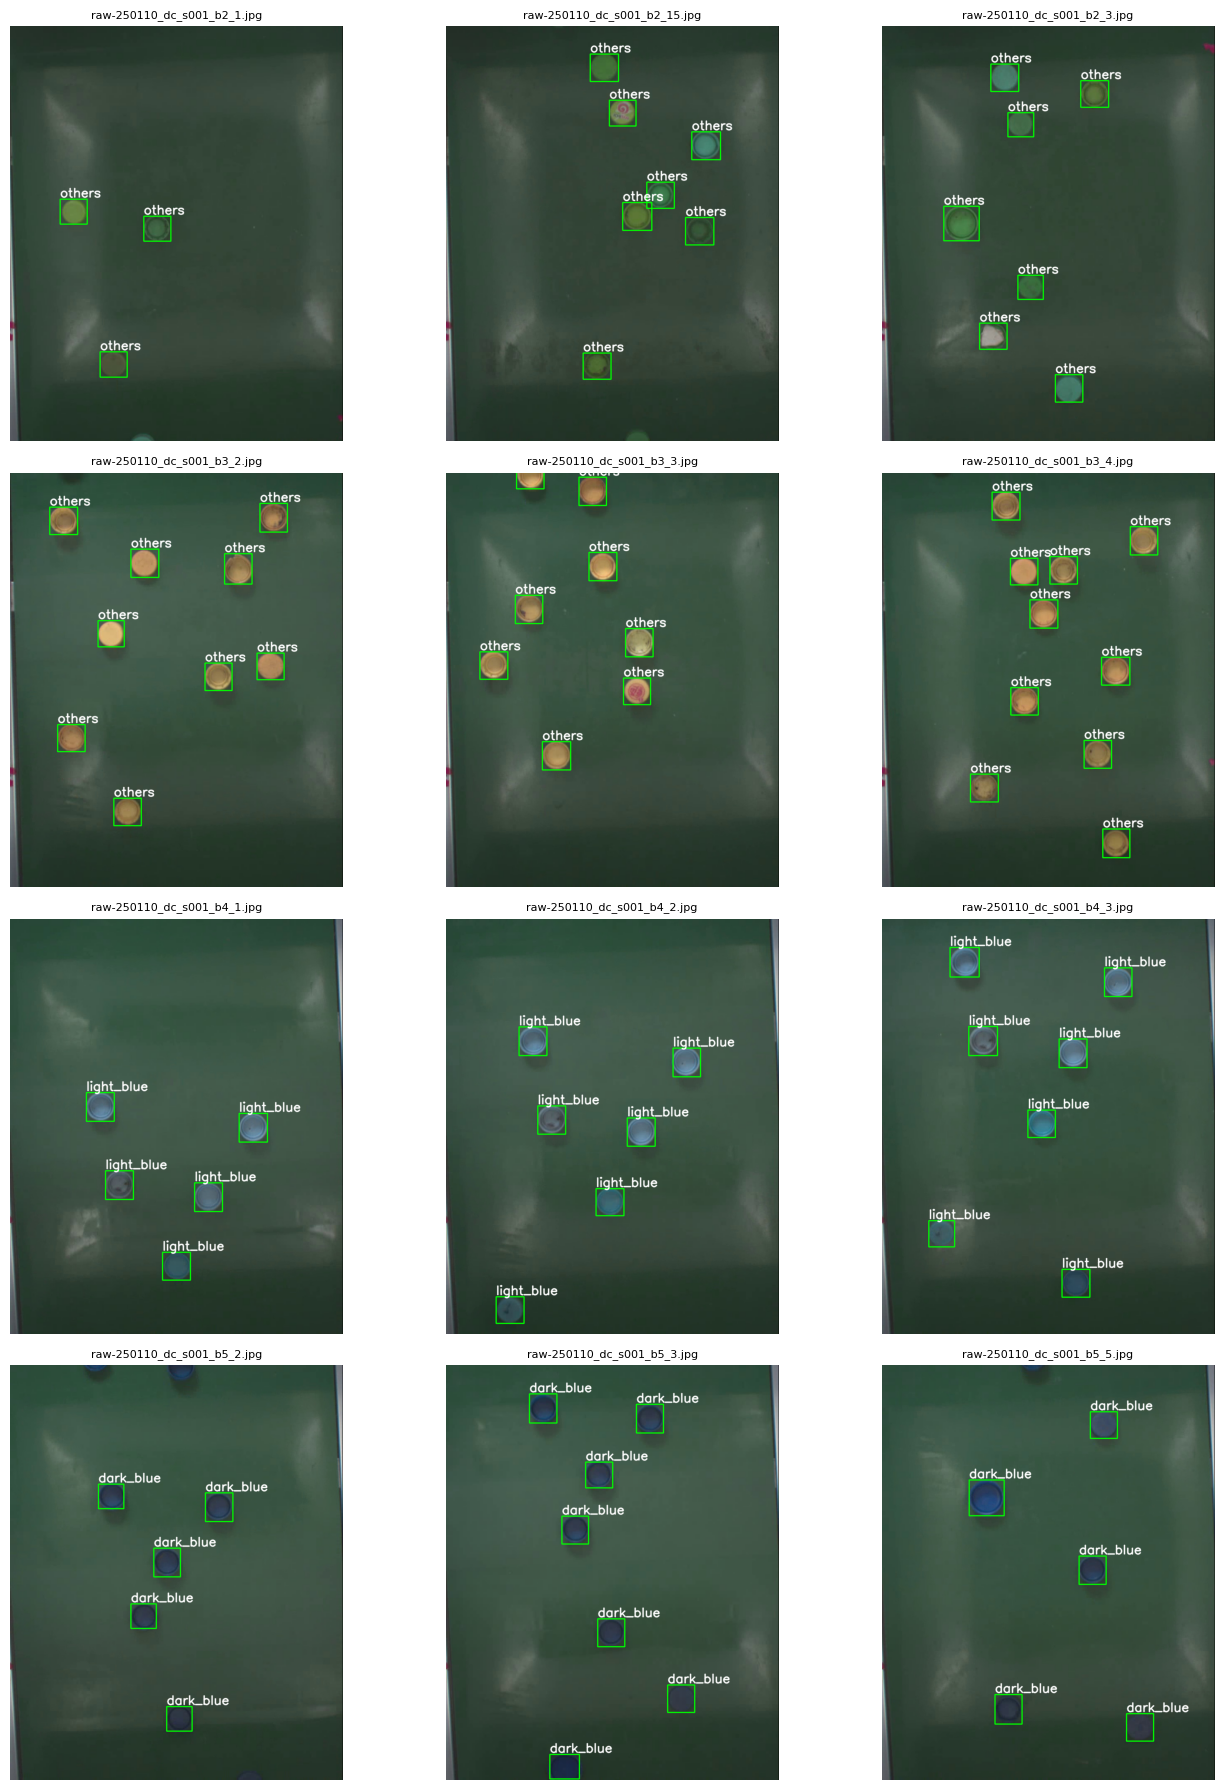

In [4]:
visualize()

Insight:

  - As shown above, the default label is 0, so we need to update it based on the color (either manually or using a color detection algorithm). I prefer doing it manually because the mapping is very clear—there is a strong correlation between the color and the image name: b2 = green, b3 = yellow, b4 = light_blue, b5 = dark_blue. Therefore, we can update the labels according to this pattern.

  - If we group green and yellow as “other,” we can observe a class imbalance where the majority of samples are labeled as 0 (others). However, this imbalance is not a major issue because YOLO focuses primarily on bounding box detection, although classification still contributes to the loss. Given that the cap shapes are fairly similar, correctly labeling the colors will still help the model learn better.

Our next goal is to relabel the data based on its true classes.

In [5]:
from scripts.adjust_label import Relabeler
# pattern of the filename is used for labeling
code2idx = {"b2": 2, "b3": 2, "b4": 0, "b5": 1}

labeler = Relabeler(code2idx, "../sample", "../sample")
labeler.process()

Relabelling raw-250110_dc_s001_b2_1.txt complete
Relabelling raw-250110_dc_s001_b2_15.txt complete
Relabelling raw-250110_dc_s001_b2_3.txt complete
Relabelling raw-250110_dc_s001_b3_2.txt complete
Relabelling raw-250110_dc_s001_b3_3.txt complete
Relabelling raw-250110_dc_s001_b3_4.txt complete
Relabelling raw-250110_dc_s001_b4_1.txt complete
Relabelling raw-250110_dc_s001_b4_2.txt complete
Relabelling raw-250110_dc_s001_b4_3.txt complete
Relabelling raw-250110_dc_s001_b5_2.txt complete
Relabelling raw-250110_dc_s001_b5_3.txt complete
Relabelling raw-250110_dc_s001_b5_5.txt complete
Relabelling 12 files complete


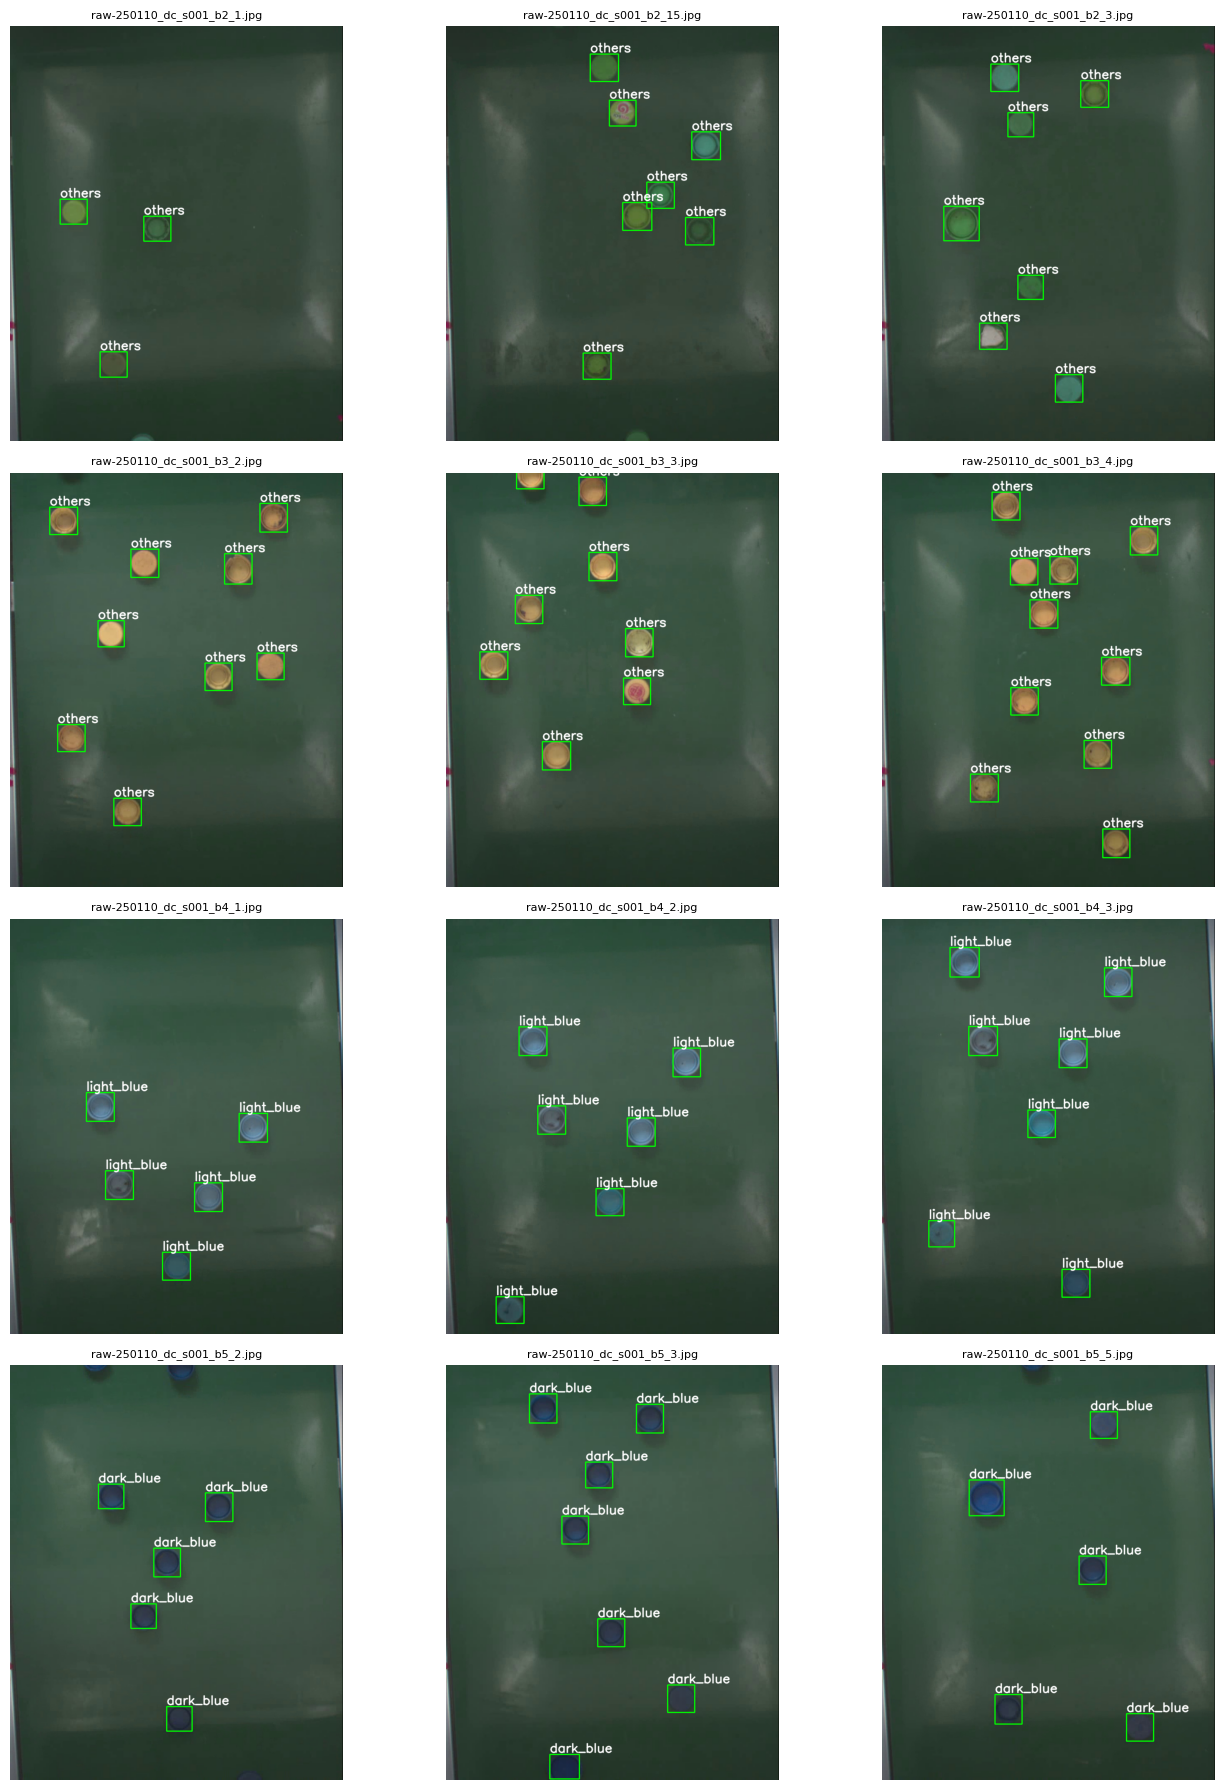

In [6]:
visualize()

Insight:

  - We have successfully relabeled the data according to their respective classes.

Next Step:

  - Our next step is to split the data into training and validation sets.

  - Since each color has 3 images, for a total of 12 images, a purely random split could lead to greater class imbalance and result in a training set that is not representative. Therefore, it is better to use a stratified split, ensuring that the train/validation ratio for each color is consistent.

  - One good approach is to assign 2 images of each color to the training set and 1 image to the validation set. This results in 8 images for training and 4 images for validation. The selection of which 2 images go to the training set can be done via random sampling.

##### Splitting Dataset

In [7]:
from scripts.dataset import DataSplitter
splitter = DataSplitter("../sample", "../data")
splitter.split(seed=2)

Splitting 8 files into train and 4 files into val


Next Step:

  - Our next goal is to train the model and analyze the results of each training run.

  - We face the issue of data imbalance (labels), which can affect the classification loss, especially given the small dataset. This can be mitigated through various data augmentation techniques. YOLO provides default augmentation parameters, but we can also define our own.

  - Our data augmentation parameters are defined in the settings.yaml configuration. For training, we will keep these parameters static and focus more on the model training hyperparameters, such as learning rate, batch size, number of epochs, optimizer, and so on.

In [8]:
def show_result(dir:str):
    # List of image paths
    file_names = [
        'BoxF1_curve.png',
        'BoxP_curve.png',
        'BoxPR_curve.png',
        'BoxR_curve.png',
        'confusion_matrix_normalized.png',
        'confusion_matrix.png',
        'val_batch0_pred.jpg',
        'val_batch0_labels.jpg'
    ]

    file_paths = [os.path.join(dir, file_name) for file_name in file_names]

    # Create a figure with 4 rows and 2 columns
    fig, axes = plt.subplots(4, 2, figsize=(15, 20))
    axes = axes.ravel()  # Flatten the 2D array of axes for easier iteration

    # Set titles for each subplot
    titles = [
        'F1 Curve', 'Precision Curve',
        'PR Curve', 'Recall Curve',
        'Normalized Confusion Matrix', 'Confusion Matrix',
        'Validation Predictions', 'Validation Labels'
    ]

    # Display each image in a subplot
    for idx, (img_path, title) in enumerate(zip(file_paths, titles)):
        print(img_path)
        if os.path.exists(img_path):
            img = cv2.imread(img_path)
            axes[idx].imshow(img)
            axes[idx].set_title(title, fontsize=10)
            axes[idx].axis('off')
        else:
            print(f"Warning: Image not found - {img_path}")
            axes[idx].axis('off')
            axes[idx].set_title(f"Missing: {title}", fontsize=10, color='red')

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

-------------------------------------------------------------------

### First Experiment - train_b8_ep100_im320

Dynamic hyperparameters are those that can change during experimentation. In our case, we use:
  - Batch size: 8
  - Epochs: 100
  - Image size: 320

Other hyperparameters remain static, such as:
  - Learning rate: 0.001
  - Optimizer: AdamW (recommended for fine-tuning with custom data)
  - Augmentation parameters

../bottle_cap_detection/train_b8_ep100_im320\BoxF1_curve.png
../bottle_cap_detection/train_b8_ep100_im320\BoxP_curve.png
../bottle_cap_detection/train_b8_ep100_im320\BoxPR_curve.png
../bottle_cap_detection/train_b8_ep100_im320\BoxR_curve.png
../bottle_cap_detection/train_b8_ep100_im320\confusion_matrix_normalized.png
../bottle_cap_detection/train_b8_ep100_im320\confusion_matrix.png
../bottle_cap_detection/train_b8_ep100_im320\val_batch0_pred.jpg
../bottle_cap_detection/train_b8_ep100_im320\val_batch0_labels.jpg


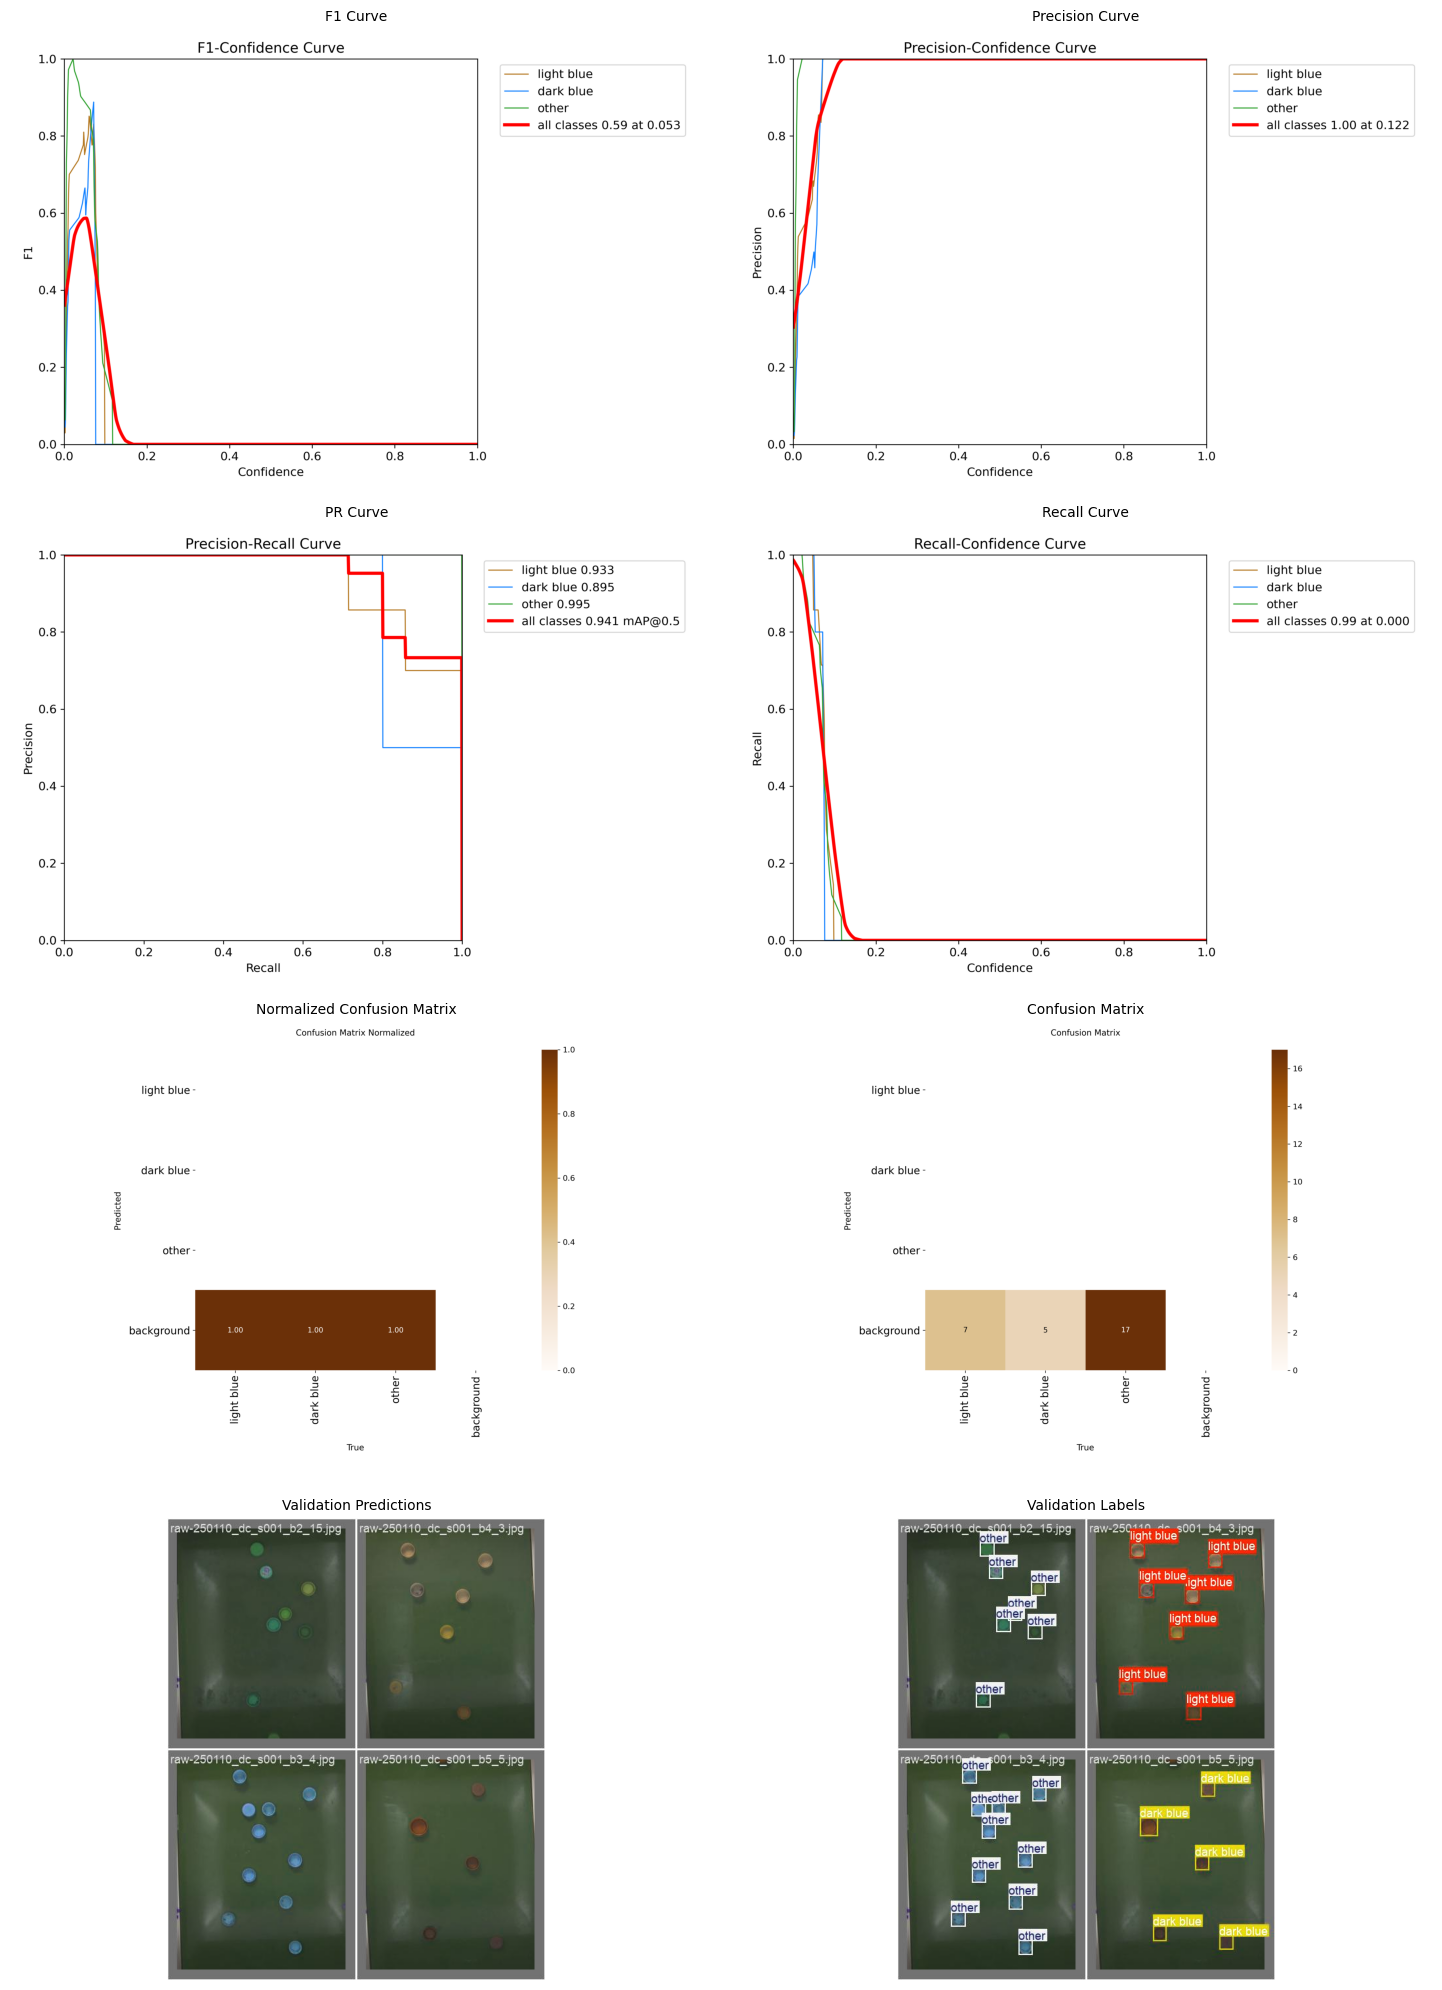

In [9]:
##### Result
show_result('../bottle_cap_detection/train_b8_ep100_im320')

##### Insight
- The first experiment achieved a **0.941 mAP0.5** score, as shown in the Precision-Recall curve, indicating very high performance. However, when inspecting the validation predictions, it fails to predict anything correctly. This happens because the predicted labels have **very low confidence scores**. For a prediction to be considered valid in YOLO, its confidence score must exceed a threshold (default = 0.35).  
- This observation is supported by plotting the confidence scores on the x-axis: most predictions occur below 0.2 confidence, even though the mAP metric appears high. This highlights that relying solely on mAP can be **misleading**; other metrics and aspects must also be considered.  
- For this experiment: **Precision = 0% (0 / (0 + ε))**, **Recall = 0% (0 / 29)**

-----------------------------------------

### Experiment 2 - train_b16_ep100_im320

../bottle_cap_detection/train_b16_ep100_im320\BoxF1_curve.png
../bottle_cap_detection/train_b16_ep100_im320\BoxP_curve.png
../bottle_cap_detection/train_b16_ep100_im320\BoxPR_curve.png
../bottle_cap_detection/train_b16_ep100_im320\BoxR_curve.png
../bottle_cap_detection/train_b16_ep100_im320\confusion_matrix_normalized.png
../bottle_cap_detection/train_b16_ep100_im320\confusion_matrix.png
../bottle_cap_detection/train_b16_ep100_im320\val_batch0_pred.jpg
../bottle_cap_detection/train_b16_ep100_im320\val_batch0_labels.jpg


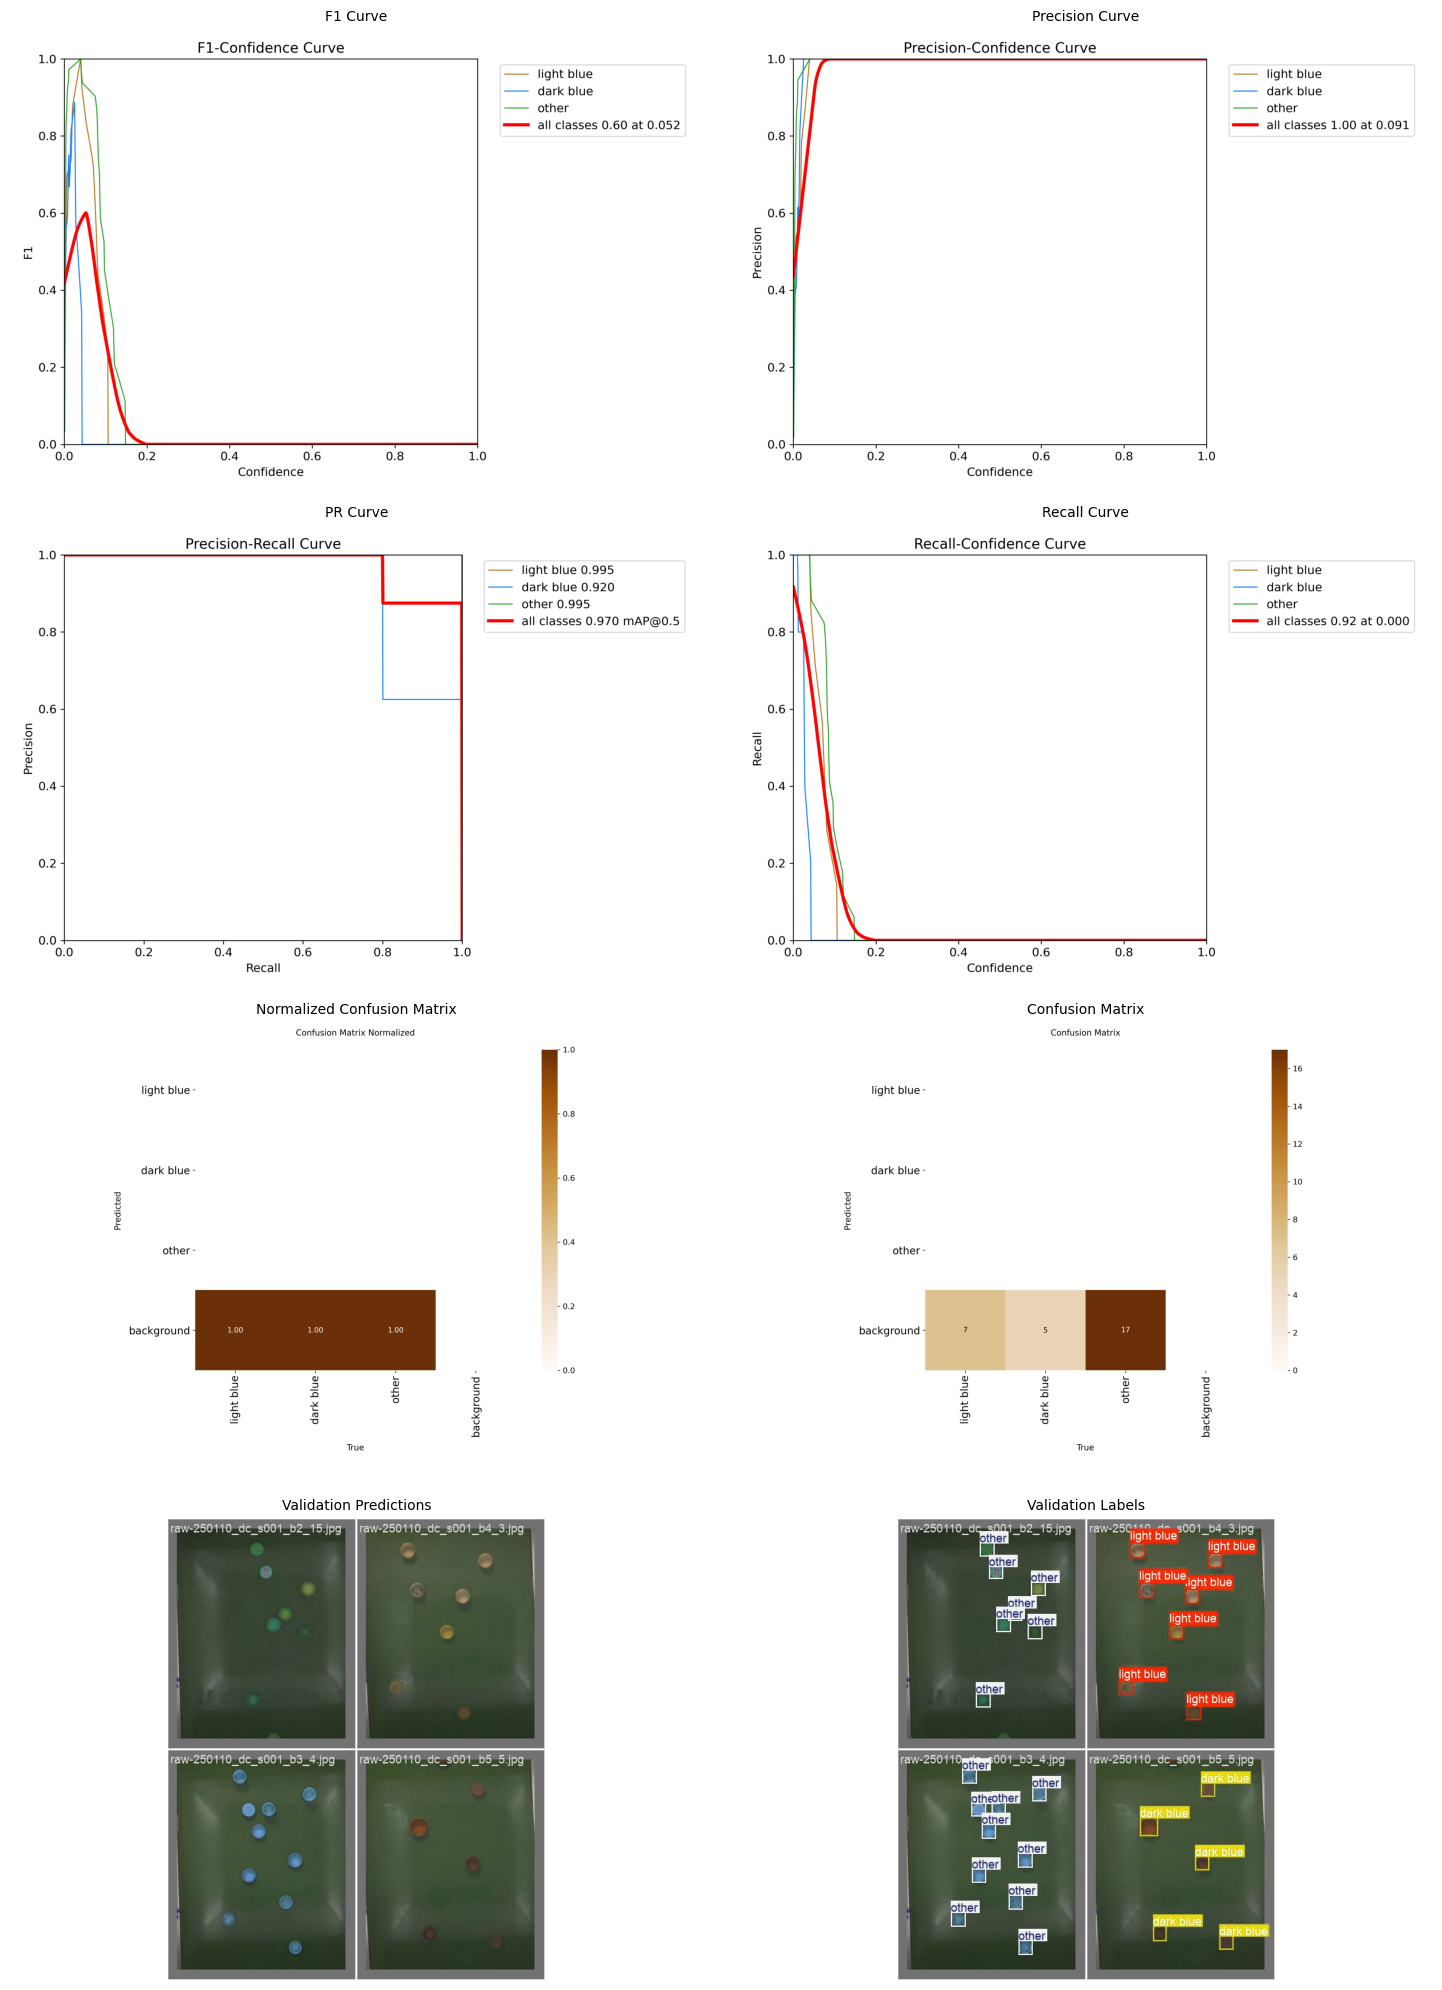

In [10]:
##### Result
show_result('../bottle_cap_detection/train_b16_ep100_im320')

##### Insight
- Our second experiment differs from the first primarily in **batch size** (16 vs 8).  
- The **mAP@0.5** improved to **0.97**, higher than the first experiment, indicating very high performance according to the mAP metric. However, analysis of the validation predictions shows that it still **fails completely**.  
- The issue is the same as in the first experiment: the **confidence scores** for all predictions are too low, making the predictions unreliable and treated as background.  
- For this experiment: **Precision = 0% (0 / (0 + ε))**, **Recall = 0% (0 / 29)**

-----------------------------------------

### Experiment 3 - train_b8_ep500_im320

../bottle_cap_detection/train_b8_ep500_im320\BoxF1_curve.png
../bottle_cap_detection/train_b8_ep500_im320\BoxP_curve.png
../bottle_cap_detection/train_b8_ep500_im320\BoxPR_curve.png
../bottle_cap_detection/train_b8_ep500_im320\BoxR_curve.png
../bottle_cap_detection/train_b8_ep500_im320\confusion_matrix_normalized.png
../bottle_cap_detection/train_b8_ep500_im320\confusion_matrix.png
../bottle_cap_detection/train_b8_ep500_im320\val_batch0_pred.jpg
../bottle_cap_detection/train_b8_ep500_im320\val_batch0_labels.jpg


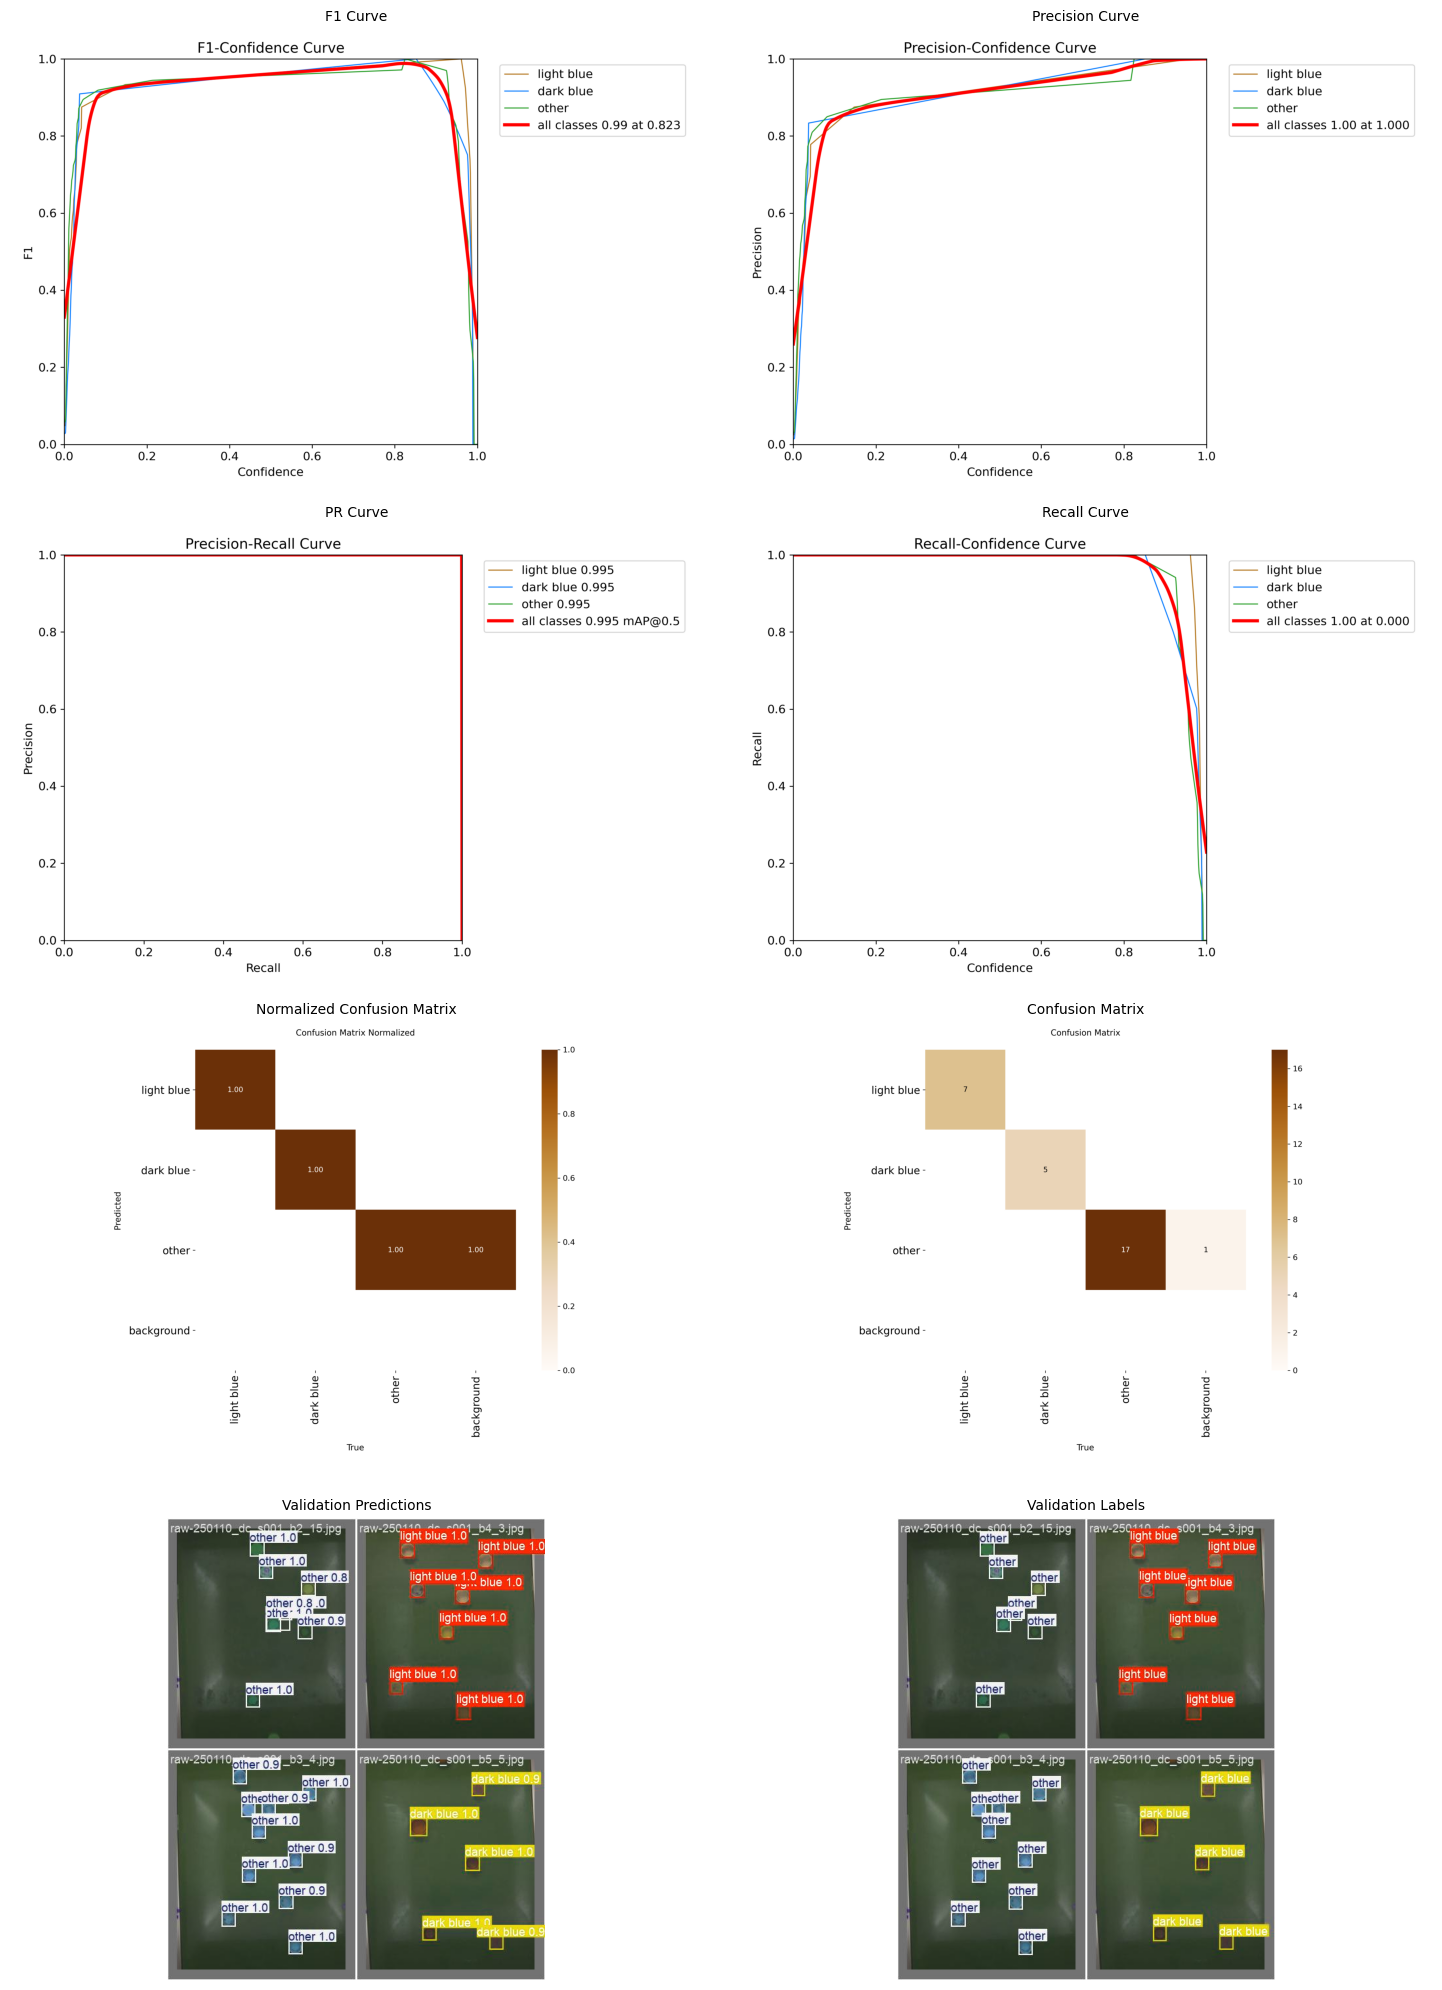

In [11]:
show_result('../bottle_cap_detection/train_b8_ep500_im320')

##### Insight
- Our third experiment differs from the first and second experiments in **epochs** (500 vs 100).  
- Training actually stopped between 200–300 epochs due to **early stopping** (loss either decreasing or plateauing for several iterations).  
- The **mAP@0.5** improved to **0.995**, higher than the first two experiments, indicating very high performance. Unlike previous experiments, the model now predicts almost everything correctly, with only **one false positive**. In this case, we can conclude that the model performs very well, as both the mAP and the confusion matrix are consistent.  
- The **confidence scores** for each prediction are high, showing that the model confidently identifies the caps with the correct class.  
- For this experiment: **Precision = 96.7% (29 / 30)**, **Recall = 100% (29 / 29)**

-------------------------

### Experiment 4 - train_b16_ep500_im320

../bottle_cap_detection/train_b16_ep500_im320\BoxF1_curve.png
../bottle_cap_detection/train_b16_ep500_im320\BoxP_curve.png
../bottle_cap_detection/train_b16_ep500_im320\BoxPR_curve.png
../bottle_cap_detection/train_b16_ep500_im320\BoxR_curve.png
../bottle_cap_detection/train_b16_ep500_im320\confusion_matrix_normalized.png
../bottle_cap_detection/train_b16_ep500_im320\confusion_matrix.png
../bottle_cap_detection/train_b16_ep500_im320\val_batch0_pred.jpg
../bottle_cap_detection/train_b16_ep500_im320\val_batch0_labels.jpg


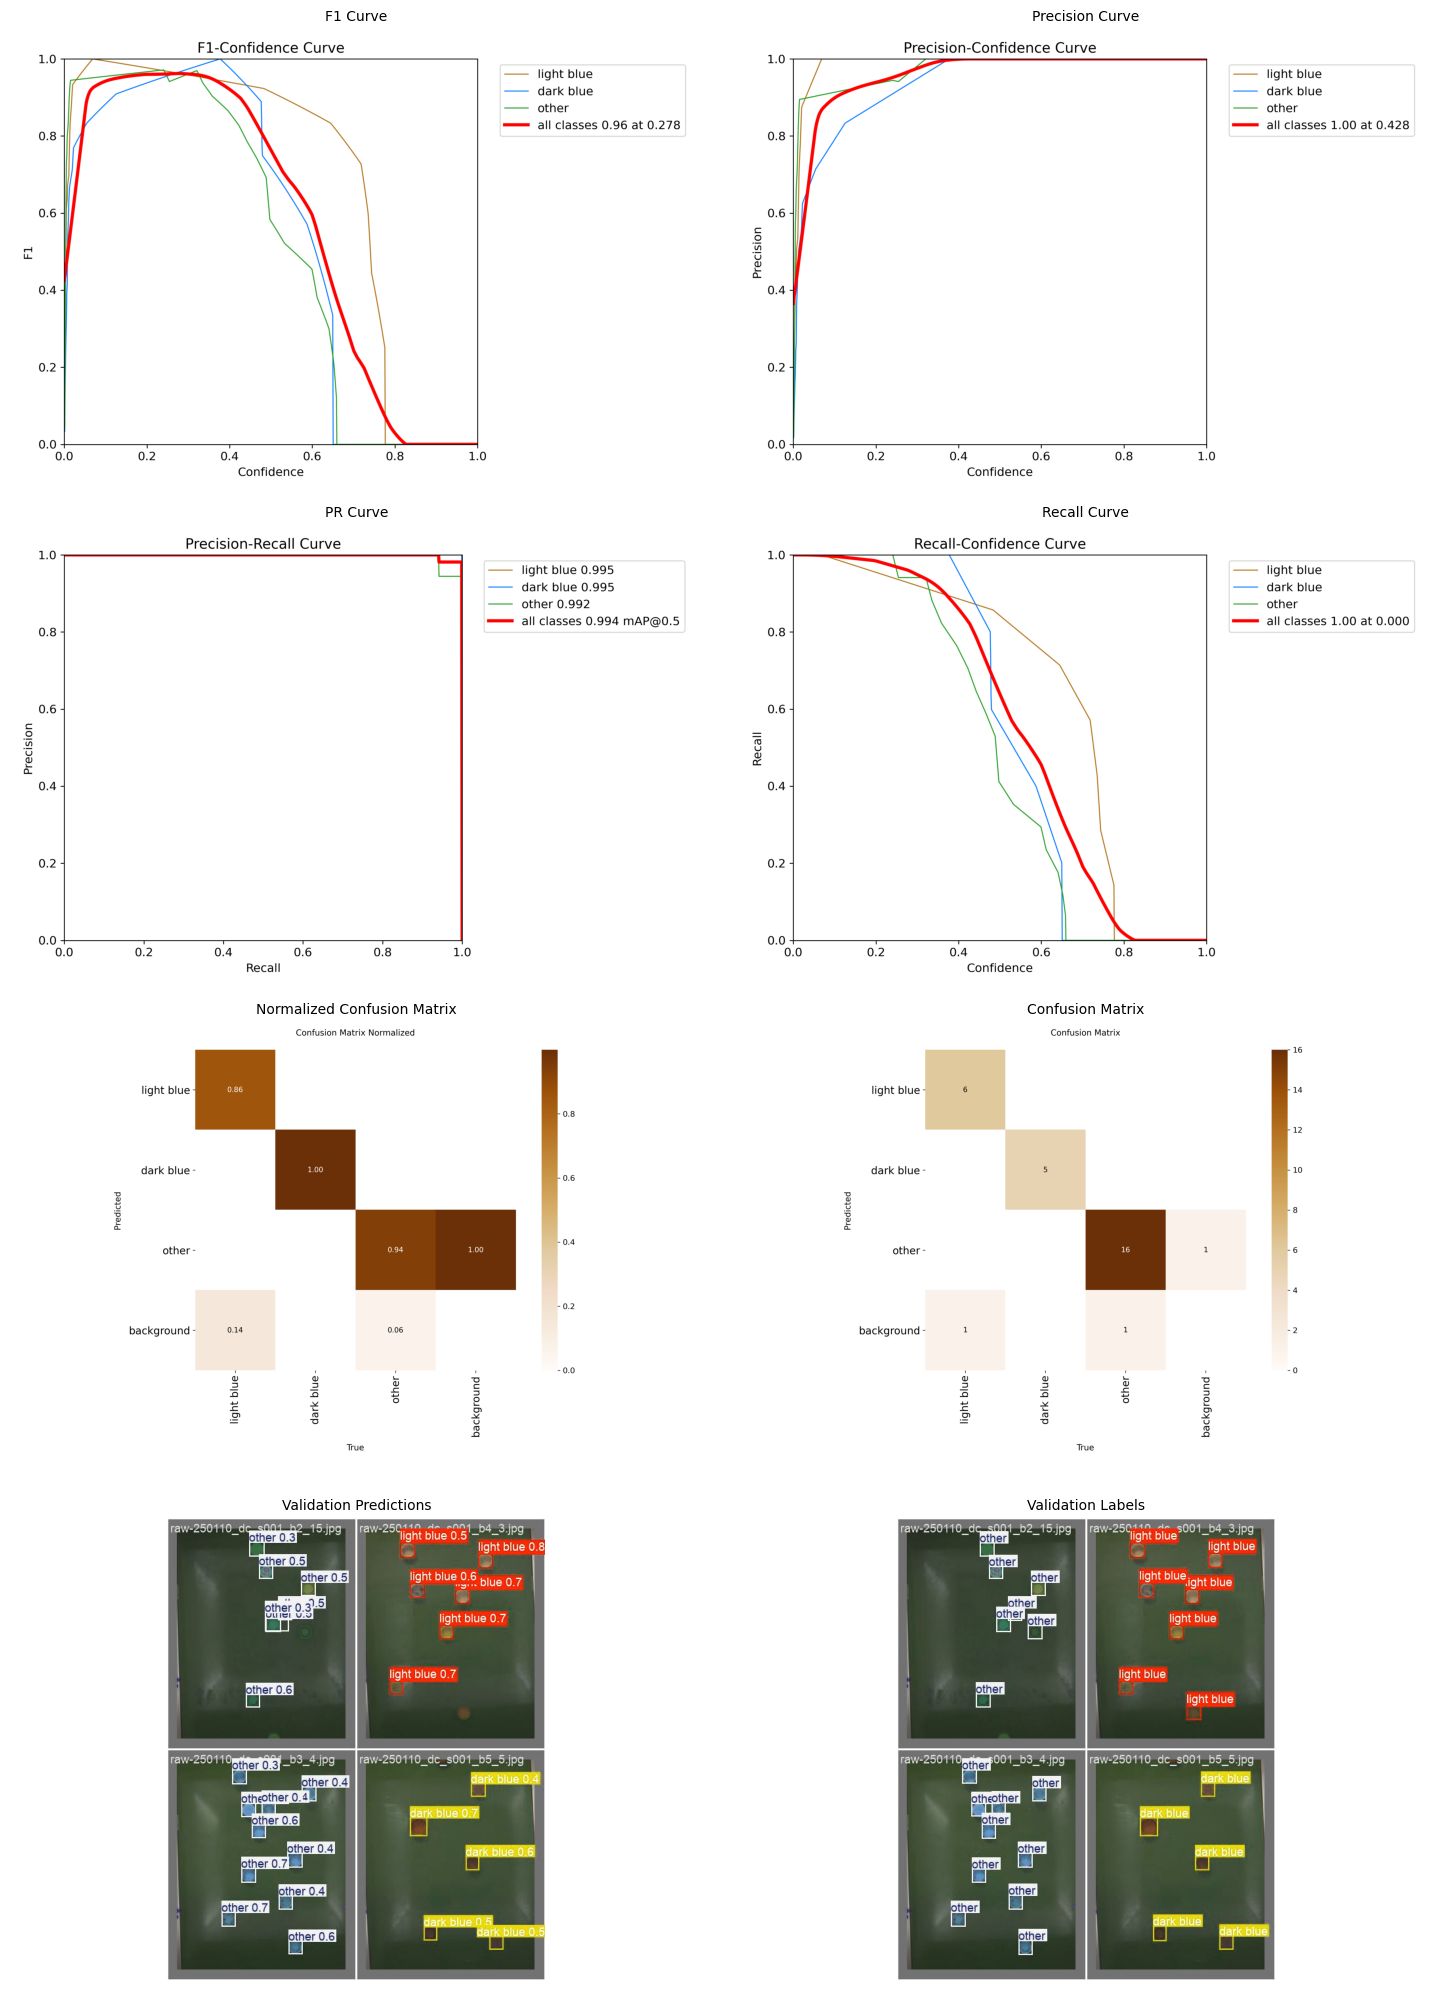

In [12]:
show_result('../bottle_cap_detection/train_b16_ep500_im320')

##### Insight
- Our fourth experiment differs from the third experiment in **batch size** (16 vs 8).  
- The **mAP@0.5** is **0.995**, negligibly lower than the third experiment, so overall performance appears similar. However, for validation predictions, it performs slightly worse, with **2 false negatives** and **1 false positive**, making it less accurate than the third experiment.  
- The **confidence scores** are also lower compared to the third experiment, indicating that the model is less confident about the bounding boxes and object positions.  
- For this experiment: **Precision = 96.43% (27 / 28)**, **Recall = 93.10% (27 / 29)** — still high performance.

### Analysis
- The best model from our experiments is the **third experiment** with dynamic hyperparameters: **epochs = 500**, **image size = 320**, **batch size = 8**.  
- Increasing the **epochs** from 100 to 500 does not significantly improve mAP, but it **substantially increases the confidence scores**, resulting in truly high performance.  
- Increasing the **batch size** from 8 to 16 at **epochs = 100** slightly improves mAP, with a minor effect on prediction confidence. However, at **epochs = 500**, increasing the batch size from 8 to 16 slightly decreases mAP (negligible) but **significantly reduces the confidence scores** of predictions.

### Opinion
- From the four experiments, we identified the best model, but is it truly the **global best model**? The answer is **not certain**. We have not explored enough parameters, and many hyperparameters were kept static for simplicity.

----------------------

### Additional

we need to measure the runtime of the best model

In [17]:
from tools.cpu_inference import run_inference
model_dir = "../bottle_cap_detection/train_b8_ep500_im320/weights/best_ncnn_model"
img_path = "../data/images/val/raw-250110_dc_s001_b2_15.jpg"
run_inference(model_dir, img_path, num_runs=1000, num_warmups=20)

Max: 55.6492 ms
Min: 9.7693 ms
Avg: 12.8849 ± 1.8726 ms


- latency in jupyter notebook --> (12.88 +- 1.87) ms
- latency in python script --> (11 +- 2) ms

The Above latency result is still above the expected (constraint) --> (5ms - 10ms). further optimization is needed.